# Risk Prediction of Cardiovascular Disease

## Problem Statement:
To predict the risk of cardiovascular (heart) disease using machine learning techniques based on clinical and demographic data. The objective is to analyze relevant features such as age, blood pressure, cholesterol levels, BMI, lifestyle habits, and medical history, and build a model that can classify whether a person is at risk of heart disease or not.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
df=pd.read_csv("new_excel_sheet.csv")

##  Data Exploration

#### Check the dimensions (number of rows and columns) to get an overview of the data structure

In [3]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11029,Very Good,Within the past 2 years,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Female,50-54,155.0,63.50,26.45,Yes,12.0,12.0,30.0,4.0
11030,Good,Within the past year,Yes,No,Yes,No,No,Yes,Yes,Male,70-74,178.0,77.11,24.39,Yes,30.0,8.0,2.0,16.0
11031,Good,Within the past year,Yes,No,No,No,No,No,No,Male,18-24,170.0,95.25,32.89,No,4.0,12.0,3.0,8.0
11032,Good,Within the past year,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Female,35-39,165.0,93.89,34.45,No,2.0,16.0,8.0,12.0


In [4]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
11029,Very Good,Within the past 2 years,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Female,50-54,155.0,63.50,26.45,Yes,12.0,12.0,30.0,4.0
11030,Good,Within the past year,Yes,No,Yes,No,No,Yes,Yes,Male,70-74,178.0,77.11,24.39,Yes,30.0,8.0,2.0,16.0
11031,Good,Within the past year,Yes,No,No,No,No,No,No,Male,18-24,170.0,95.25,32.89,No,4.0,12.0,3.0,8.0
11032,Good,Within the past year,Yes,No,No,No,No,"Yes, but female told only during pregnancy",No,Female,35-39,165.0,93.89,34.45,No,2.0,16.0,8.0,12.0
11033,Very Good,Within the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.shape)
df.info()

(11034, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11034 entries, 0 to 11033
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                11034 non-null  object 
 1   Checkup                       11034 non-null  object 
 2   Exercise                      11033 non-null  object 
 3   Heart_Disease                 11033 non-null  object 
 4   Skin_Cancer                   11033 non-null  object 
 5   Other_Cancer                  11033 non-null  object 
 6   Depression                    11033 non-null  object 
 7   Diabetes                      11033 non-null  object 
 8   Arthritis                     11033 non-null  object 
 9   Sex                           11033 non-null  object 
 10  Age_Category                  11033 non-null  object 
 11  Height_(cm)                   11033 non-null  float64
 12  Weight_(kg)                   11033 non-null  fl

#### The dataset has 11,034 entries and 19 columns, with 12 categorical and 7 numerical features. Most columns have 11,033 non-null values, with minimal missing data. The data types include float64 for numerical columns and object for categorical ones, with a memory usage of 1.6 MB.

In [7]:
print(df.describe())
df.describe(include=object)

        Height_(cm)   Weight_(kg)           BMI  Alcohol_Consumption  \
count  11033.000000  11033.000000  11033.000000         11033.000000   
mean     170.701894     83.594730     28.610402             5.050394   
std       10.642403     20.968088      6.446532             8.490546   
min      122.000000     32.660000     13.310000             0.000000   
25%      163.000000     68.040000     24.210000             0.000000   
50%      170.000000     81.650000     27.460000             0.000000   
75%      178.000000     95.250000     31.750000             5.000000   
max      229.000000    235.870000     89.100000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count       11033.000000                  11033.000000   
mean           28.887701                     14.895405   
std            24.669799                     14.493395   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,11034,11034,11033,11033,11033,11033,11033,11033,11033,11033,11033,11033
unique,6,6,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,3720,8234,8305,10057,9756,9882,9018,9191,7178,5911,1290,6311


#### The dataset includes numerical features with average height (170.7 cm), weight (83.6 kg), and BMI (28.6), with wide ranges in consumption variables. Categorical features show that "Very Good" is the most common general health status, "Within the past year" is the most frequent checkup, and "No" is predominant for health conditions like heart disease. "Female" is the most common sex, and "65-69" is the most frequent age category. Most individuals report no smoking history.

In [8]:
for i in df.columns:
    print("unique in",i,':',df[i].unique())

unique in General_Health : ['Poo' 'Very Good' 'Poor' 'Good' 'Fair' 'Excellent']
unique in Checkup : ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never' 'Within the ']
unique in Exercise : ['No' 'Yes' nan]
unique in Heart_Disease : ['No' 'Yes' nan]
unique in Skin_Cancer : ['No' 'Yes' nan]
unique in Other_Cancer : ['No' 'Yes' nan]
unique in Depression : ['No' 'Yes' nan]
unique in Diabetes : ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy' nan]
unique in Arthritis : ['Yes' 'No' nan]
unique in Sex : ['Female' 'Male' nan]
unique in Age_Category : ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29' nan]
unique in Height_(cm) : [150. 165. 163. 180. 191. 183. 175. 160. 168. 178. 152. 157. 188. 185.
 170. 173. 155. 193. 196. 206. 198. 140. 135. 145. 147. 142. 201. 218.
 124. 203. 137. 122. 216. 224. 229. 151. 177. 164. 162. 156. 153. 169.


In [9]:
# Identify and sort numerics
numerical_cols = df.select_dtypes(include=['number']).columns

# Sort full DataFrame by all numerics (optional)
df_sorted = df.sort_values(by=numerical_cols.tolist())

# Preview sorted unique values
for col in numerical_cols:
    print(f"{col} sorted unique values:\n", sorted(df[col].dropna().unique()))
    print("-" * 40)

Height_(cm) sorted unique values:
 [np.float64(122.0), np.float64(124.0), np.float64(135.0), np.float64(137.0), np.float64(140.0), np.float64(142.0), np.float64(145.0), np.float64(147.0), np.float64(150.0), np.float64(151.0), np.float64(152.0), np.float64(153.0), np.float64(155.0), np.float64(156.0), np.float64(157.0), np.float64(160.0), np.float64(162.0), np.float64(163.0), np.float64(164.0), np.float64(165.0), np.float64(167.0), np.float64(168.0), np.float64(169.0), np.float64(170.0), np.float64(172.0), np.float64(173.0), np.float64(175.0), np.float64(177.0), np.float64(178.0), np.float64(180.0), np.float64(183.0), np.float64(185.0), np.float64(188.0), np.float64(191.0), np.float64(193.0), np.float64(196.0), np.float64(198.0), np.float64(201.0), np.float64(203.0), np.float64(206.0), np.float64(216.0), np.float64(218.0), np.float64(224.0), np.float64(229.0)]
----------------------------------------
Weight_(kg) sorted unique values:
 [np.float64(32.66), np.float64(33.11), np.float64(34

In [10]:
df['General_Health'] = df['General_Health'].replace('Poo', 'Poor')

#### The code replaces the value 'Poo' with 'Poor' in the 'General_Health' column, correcting a possible typo.

In [11]:
df['General_Health'] = pd.Categorical(df['General_Health'],
    categories=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], ordered=True)

df['Checkup'] = pd.Categorical(df['Checkup'],
    categories=['Never', '5 or more years ago', 'Within the past 5 years',
                'Within the past 2 years', 'Within the past year'], ordered=True)

df['Age_Category'] = pd.Categorical(df['Age_Category'],
    categories=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
                '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], ordered=True)

# Sort the DataFrame based on these logical categorical columns
df = df.sort_values(by=['General_Health', 'Checkup', 'Age_Category'])

# Optional: Display sorted unique values for all categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {sorted(df[col].dropna().unique())}")

Exercise: ['No', 'Yes']
Heart_Disease: ['No', 'Yes']
Skin_Cancer: ['No', 'Yes']
Other_Cancer: ['No', 'Yes']
Depression: ['No', 'Yes']
Diabetes: ['No', 'No, pre-diabetes or borderline diabetes', 'Yes', 'Yes, but female told only during pregnancy']
Arthritis: ['No', 'Yes']
Sex: ['Female', 'Male']
Smoking_History: ['No', 'Yes']


#### The code orders and sorts categorical columns (General_Health, Checkup, Age_Category), displays sorted unique values for them, and checks for missing values in the DataFrame, confirming the presence of NaN values.

In [12]:
print(df.isnull().values.any())

True


#### The statement df.isnull().values.any() returns True, indicating that there are still missing (null) values in the DataFrame.

In [13]:
print(df.isna().sum())

General_Health                  0
Checkup                         1
Exercise                        1
Heart_Disease                   1
Skin_Cancer                     1
Other_Cancer                    1
Depression                      1
Diabetes                        1
Arthritis                       1
Sex                             1
Age_Category                    1
Height_(cm)                     1
Weight_(kg)                     1
BMI                             1
Smoking_History                 1
Alcohol_Consumption             1
Fruit_Consumption               1
Green_Vegetables_Consumption    1
FriedPotato_Consumption         1
dtype: int64


#### The output shows 1 missing value in each column except General_Health.

In [14]:
categorical_cols = ['General_Health','Checkup','Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
                    'Depression', 'Diabetes', 'Arthritis', 'Sex',
                    'Age_Category', 'Smoking_History']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#### The code replaces missing values in categorical columns with the most frequent value (mode) from each column.

In [15]:
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI',
                  'Alcohol_Consumption', 'Fruit_Consumption',
                  'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

#### The code fills missing values in numerical columns with the median value of each column, preserving data distribution.

In [16]:
print(df.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


#### The code checks for missing values in the DataFrame and returns that there are no missing values (NaN) in any of the columns, as all columns show a count of 0 for missing values.

In [17]:
df.duplicated().sum()

np.int64(0)

#### The code checks for duplicate rows in the DataFrame and returns 0, indicating there are no duplicate rows in the dataset.

In [18]:
df.reset_index(drop=True,inplace=True)

In [19]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Never,No,Yes,No,No,No,Yes,Yes,Male,70-74,175.0,95.25,31.01,No,0.0,30.0,4.0,0.0
1,Poor,Never,Yes,No,No,Yes,No,No,Yes,Male,70-74,175.0,72.57,23.63,Yes,0.0,30.0,4.0,0.0
2,Poor,Never,No,No,No,No,Yes,No,No,Male,70-74,183.0,77.11,23.06,Yes,0.0,3.0,1.0,4.0
3,Poor,5 or more years ago,Yes,No,No,No,No,No,No,Male,18-24,180.0,72.57,22.32,No,0.0,12.0,4.0,12.0
4,Poor,5 or more years ago,Yes,No,No,No,No,No,No,Male,35-39,178.0,102.06,32.28,No,0.0,30.0,8.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11029,Excellent,Within the past year,Yes,No,No,No,No,No,Yes,Male,80+,178.0,70.31,22.24,No,20.0,30.0,24.0,0.0
11030,Excellent,Within the past year,No,Yes,No,No,No,No,Yes,Male,80+,178.0,99.79,31.57,Yes,28.0,16.0,12.0,4.0
11031,Excellent,Within the past year,Yes,No,No,No,No,Yes,Yes,Male,80+,168.0,80.74,28.73,No,0.0,12.0,16.0,1.0
11032,Excellent,Within the past year,Yes,No,No,No,No,No,No,Male,80+,178.0,70.31,22.24,No,30.0,90.0,60.0,0.0


#### The command df.reset_index(drop=True, inplace=True) resets the index of the DataFrame, removing the old index and starting fresh with a default integer index. The DataFrame is now reindexed with the previous rows intact, but with a new continuous index.

# Performing Visualization
* Helps understand the data distribution, relationships, and trends.
* Assists in identifying outliers, missing values, and correlations.

## Univariate Analysis
* Analysis of a single variable to understand its distribution and characteristics.

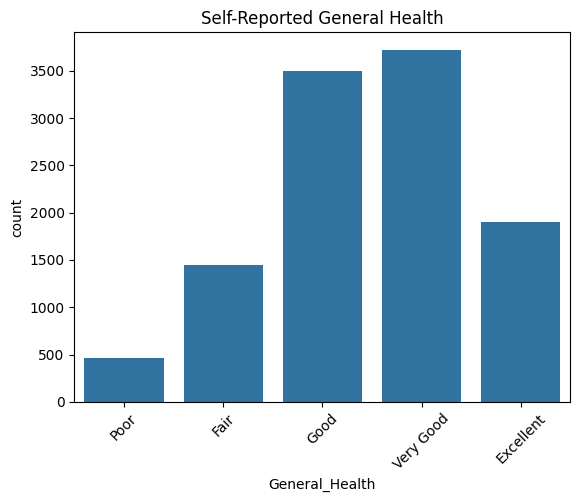

In [20]:
sns.countplot(x='General_Health', data=df, order=df['General_Health'].cat.categories)
plt.title("Self-Reported General Health")
plt.xticks(rotation=45)
plt.show()

#### The bar plot shows that most people rate their general health as "Very Good" or "Good," with fewer reporting "Excellent," and the least reporting "Fair" or "Poor." This indicates a generally positive perception of health among respondents, though the lower representation of "Poor" and "Fair" suggests potential class imbalance that may need attention in analysis or modeling.

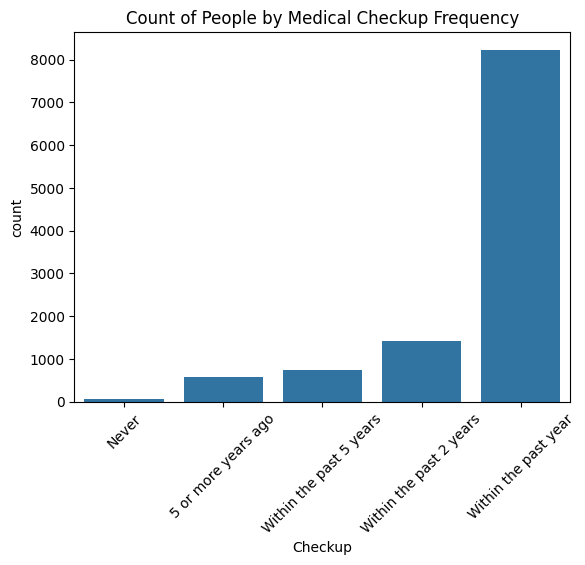

In [21]:
sns.countplot(x='Checkup', data=df, order=df['Checkup'].cat.categories)
plt.xticks(rotation=45)
plt.title("Count of People by Medical Checkup Frequency")
plt.show()

#### The chart shows that most people had a health check-up within the past year, indicating good health awareness. Very few delayed check-ups beyond five years or never had one, suggesting that only a small portion of the population neglects regular medical care.

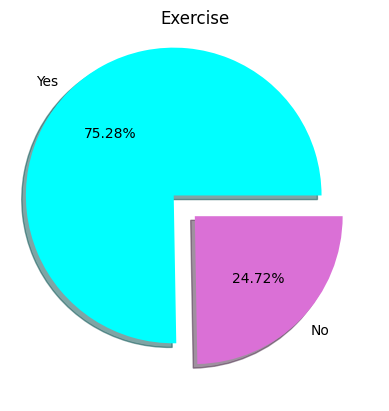

In [22]:
values = df.Exercise.value_counts().values
labels = df.Exercise.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['aqua','orchid'])
plt.title('Exercise')
plt.show()

#### The Exercise chart indicates that 77.50% of individuals in the dataset engage in regular physical activity, while 22.50% do not. This suggests that a large majority maintain an active lifestyle, which could have positive implications for overall health.

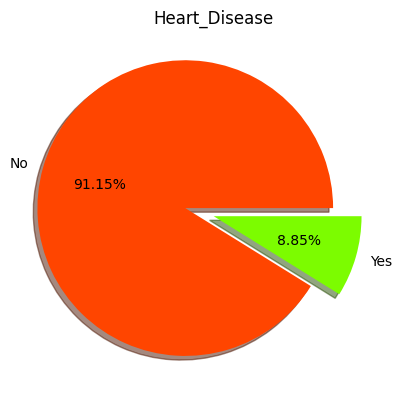

In [23]:
values = df.Heart_Disease.value_counts().values
labels = df.Heart_Disease.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['orangered','lawngreen'])
plt.title('Heart_Disease')
plt.show()

#### The Heart Disease chart shows that 91.91% of individuals do not have heart disease, while 8.09% have been diagnosed with it. This reveals that heart disease affects a small proportion of the population in the dataset.

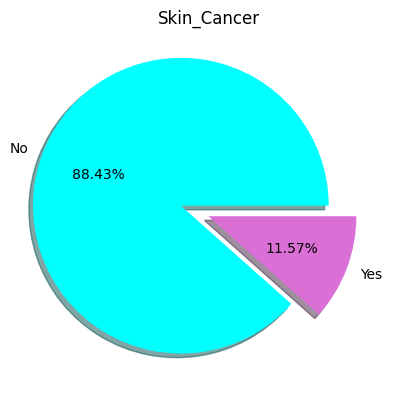

In [24]:
values = df.Skin_Cancer.value_counts().values
labels = df.Skin_Cancer.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['aqua','orchid'])
plt.title('Skin_Cancer')
plt.show()

#### The Skin Cancer chart reveals that 90.29% of individuals in the dataset have not been diagnosed with skin cancer, while 9.71% have. This indicates that skin cancer affects a relatively small portion of the population.

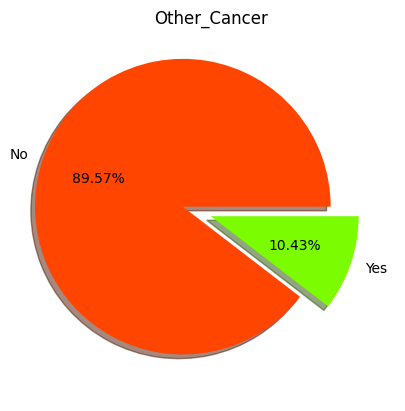

In [25]:
values = df.Other_Cancer.value_counts().values
labels = df.Other_Cancer.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['orangered','lawngreen'])
plt.title('Other_Cancer')
plt.show()

#### The Other Cancer chart shows that 90.32% of individuals have no history of other forms of cancer, while 9.68% do. Similar to skin cancer, this suggests that the incidence of other cancers is low within this dataset.

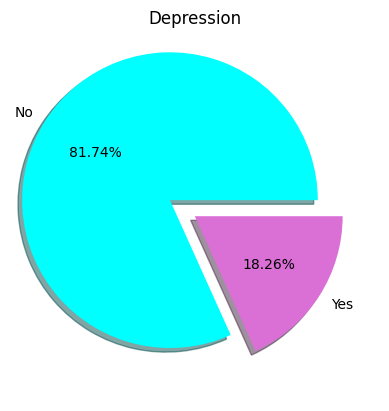

In [26]:
values = df.Depression.value_counts().values
labels = df.Depression.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['aqua','orchid'])
plt.title('Depression')
plt.show()

#### The Depression chart shows that 79.95% of individuals in the dataset have not experienced depression, while 20.05% have. This indicates that while a majority of the population reports no history of depression, a notable portion—around one in five—has experienced it.

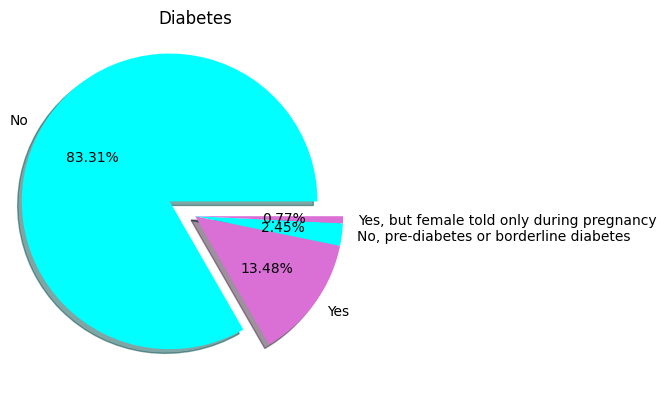

In [27]:
values = df['Diabetes'].value_counts().values
labels = df['Diabetes'].value_counts().keys()
explode = [0.2] + [0] * (len(labels) - 1)

plt.pie(values, labels=labels, explode=explode,shadow=True,autopct='%1.2f%%', colors=['aqua','orchid']) 
plt.title('Diabetes')
plt.show()

#### The pie chart shows that 83.31% of people do not have diabetes, while 13.48% do. Smaller portions reported pre-diabetes (2.45%) or gestational diabetes (0.77%). The "Yes" category is highlighted for emphasis.

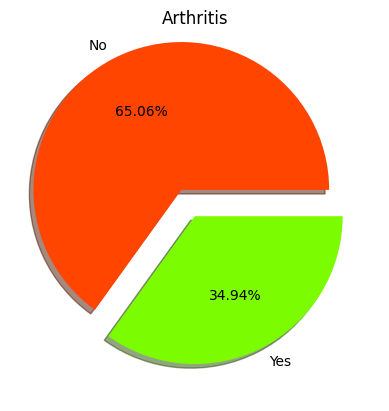

In [28]:
values = df.Arthritis.value_counts().values
labels = df.Arthritis.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['orangered','lawngreen'])
plt.title('Arthritis')
plt.show()

#### The Arthritis chart illustrates that 67.27% of individuals do not suffer from arthritis, whereas 32.73% do. This means nearly one-third of the population has arthritis, suggesting it is a relatively common condition among the individuals in the dataset.

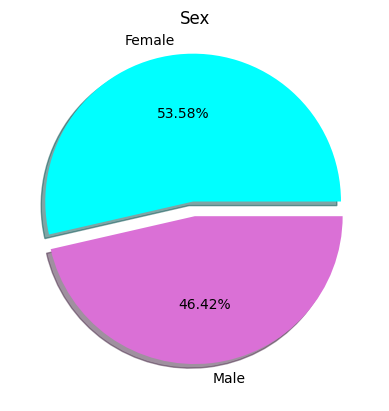

In [29]:
values = df.Sex.value_counts().values
labels = df.Sex.value_counts().keys()
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['aqua','orchid'])
plt.title('Sex')
plt.show()

#### The Sex Distribution chart shows that the dataset has a fairly balanced gender composition, with 51.87% females and 48.13% males. Although the difference is small, females make up a slightly larger portion of the population.

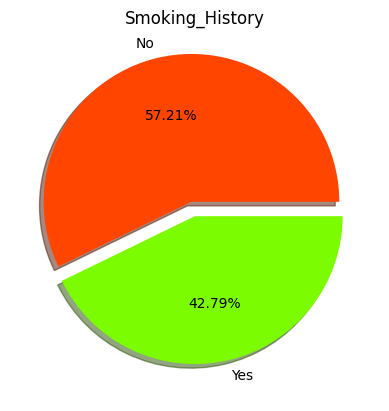

In [30]:
values = df.Smoking_History.value_counts().values
labels = df.Smoking_History.value_counts().keys()
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['orangered','lawngreen'])
plt.title('Smoking_History')
plt.show()

#### The Smoking History chart reveals that 59.43% of individuals have no history of smoking, while 40.57% do have a smoking history. This indicates that the majority of the population are non-smokers, but a considerable portion has engaged in smoking.

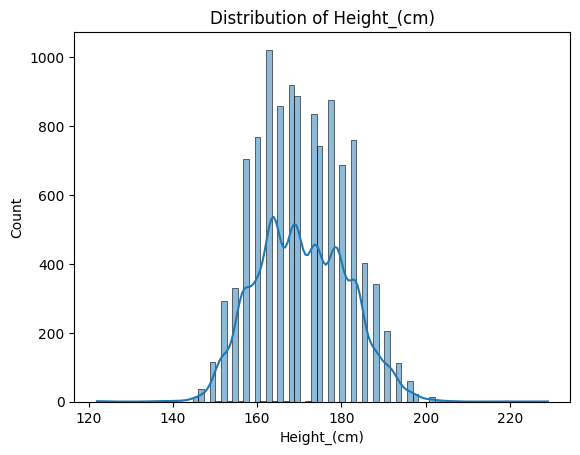

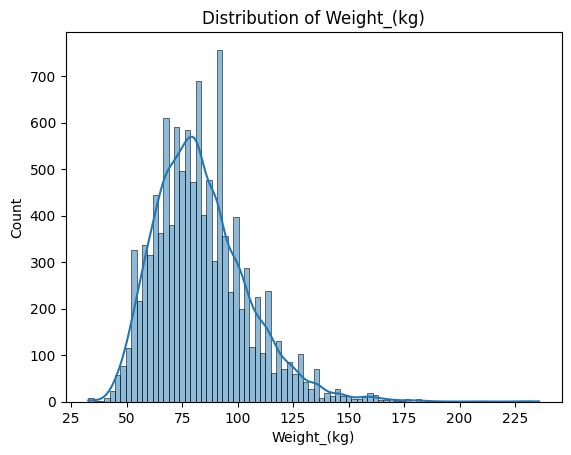

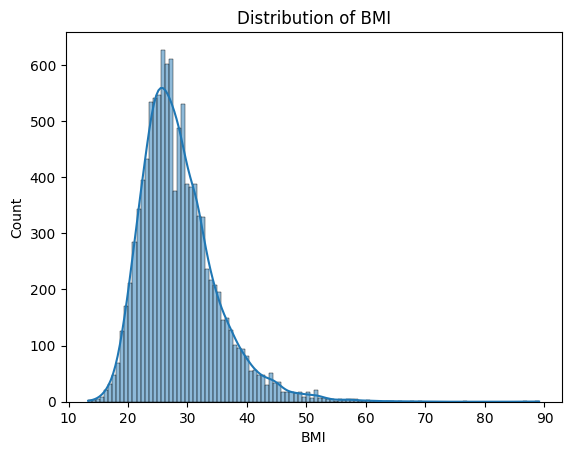

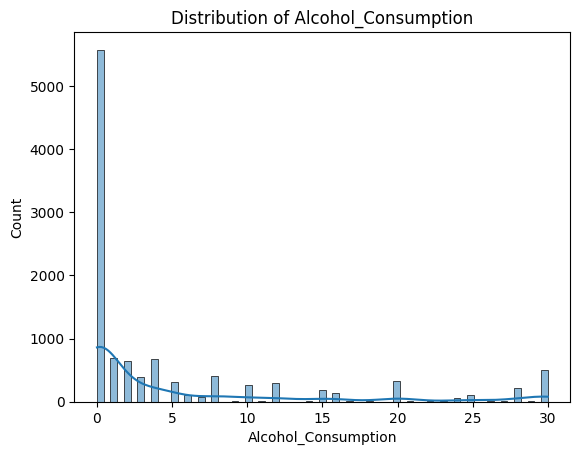

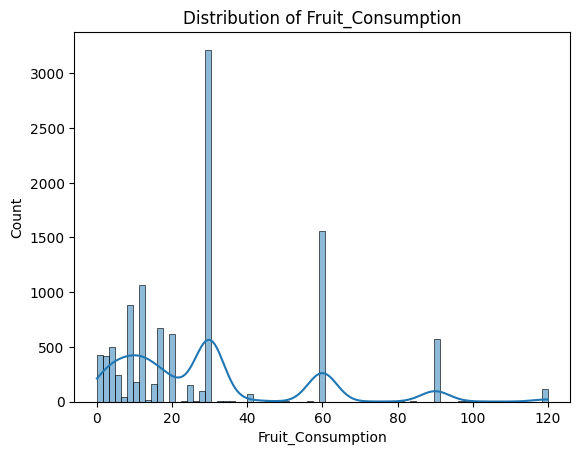

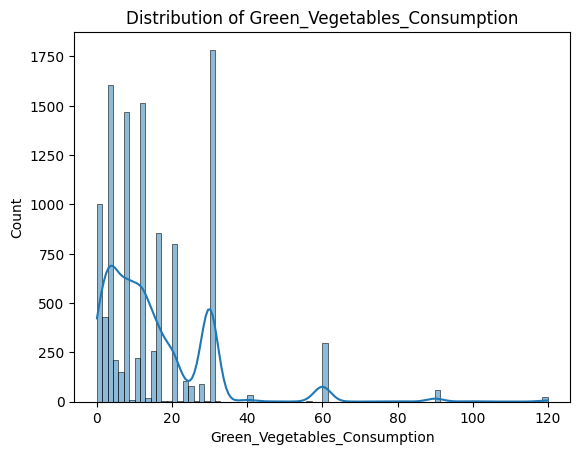

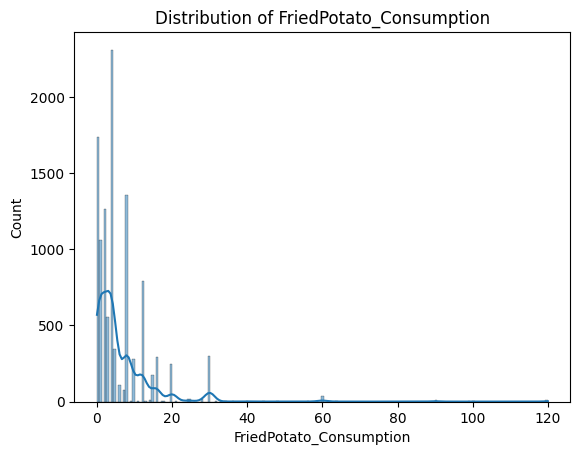

In [31]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

#### Most individuals fall within normal or moderate ranges for health metrics, but all consumption-related features are right-skewed, indicating that high consumers are rare and zero or low consumption is common.
 * Height and Weight: Height follows a near-normal distribution, while weight is right-skewed with a peak around 70–80 kg, indicating a       common average range but with some heavier outliers.

 * BMI: BMI is also right-skewed, with most values between 20 and 30, suggesting a majority fall into the normal to overweight range.

 * Alcohol Consumption: Most people report low or zero alcohol intake, with a sharp decline as consumption increases.

 * Fruit, Vegetable, and Fried Potato Consumption: These are highly right-skewed with clear peaks at certain values (e.g., 20, 30, 60), which may reflect common reporting habits or dietary patterns. The majority consume lower quantities, with a few outliers consuming very high amounts.

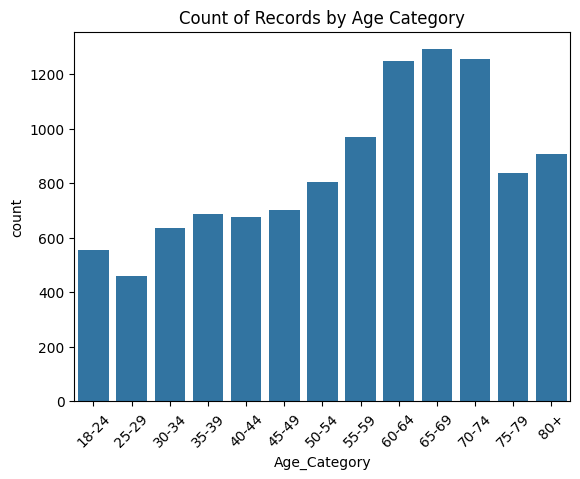

In [32]:
sns.countplot(x='Age_Category', data=df, order=df['Age_Category'].cat.categories)
plt.xticks(rotation=45)
plt.title("Count of Records by Age Category")
plt.show()

#### The chart shows the age distribution of a population, with the largest group aged 65–69. The number of individuals generally increases with age up to 65–69, then declines in older age groups. Younger age groups like 18–24 and 25–29 have fewer individuals, suggesting the dataset likely represents an older population.

## Bivariate Analysis
* Explores the relationship between two variables to identify patterns, correlations, or associations.

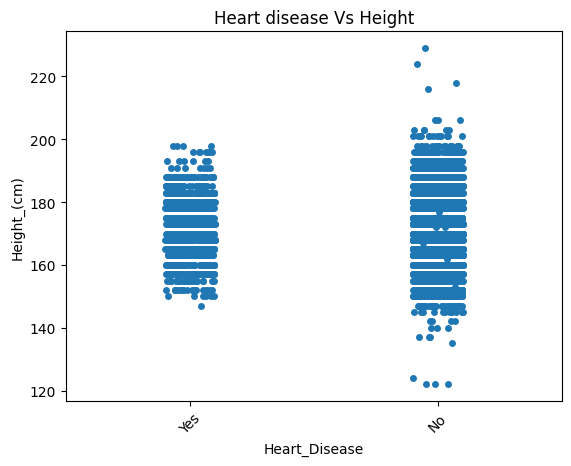

In [33]:
sns.stripplot(x='Heart_Disease', y='Height_(cm)', data=df, jitter=True)

plt.xticks(rotation=45)
plt.title('Heart disease Vs Height')
plt.show()

#### The plot shows that height distribution is similar for individuals with and without heart disease, suggesting that height does not have a significant influence on heart disease risk.

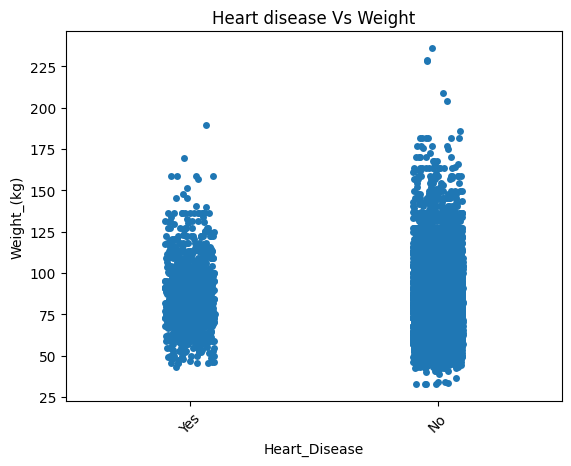

In [34]:
sns.stripplot(x='Heart_Disease', y='Weight_(kg)', data=df, jitter=True)

plt.xticks(rotation=45)
plt.title('Heart disease Vs Weight')
plt.show()

#### The plot shows that the weight distribution is fairly similar between individuals with and without heart disease, but those with heart disease tend to have slightly higher weights on average. This suggests that higher body weight may be associated with an increased risk of heart disease.

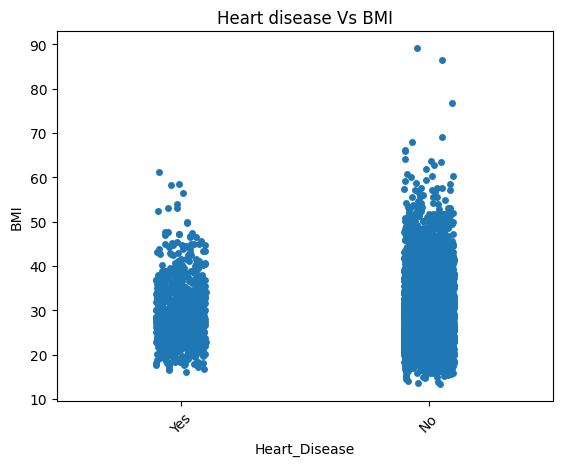

In [35]:
sns.stripplot(x='Heart_Disease', y='BMI', data=df, jitter=True)

plt.xticks(rotation=45)
plt.title('Heart disease Vs BMI')
plt.show()

#### The strip plot shows the distribution of BMI for individuals with and without heart disease. Both groups have a wide BMI range, with no clear visual difference, suggesting further analysis is needed to determine any significant relationship.

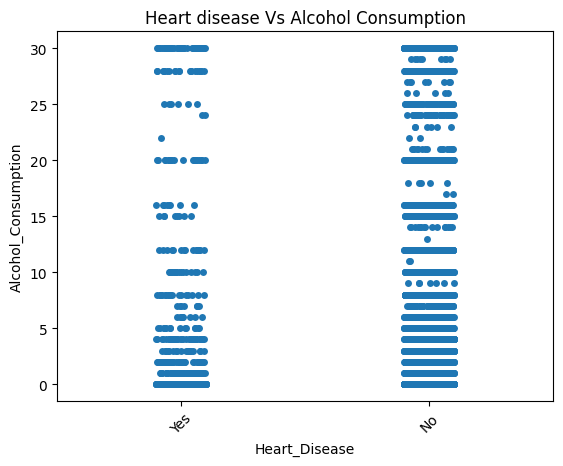

In [36]:
sns.stripplot(x='Heart_Disease', y='Alcohol_Consumption', data=df, jitter=True)

plt.xticks(rotation=45)
plt.title('Heart disease Vs Alcohol Consumption')
plt.show()

#### The plot shows that alcohol consumption levels are similarly distributed among individuals with and without heart disease, suggesting no clear visual correlation.

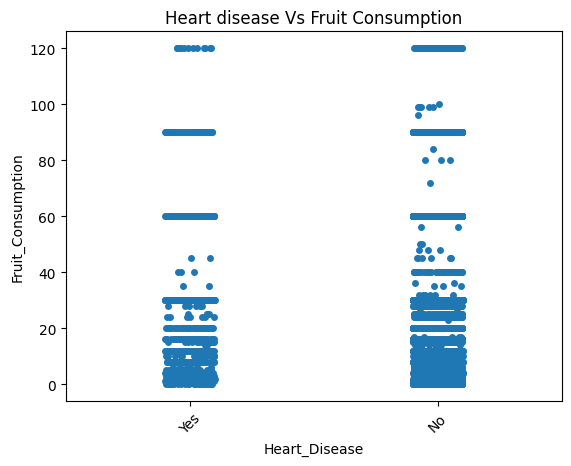

In [37]:
sns.stripplot(x='Heart_Disease', y='Fruit_Consumption', data=df, jitter=True)

plt.xticks(rotation=45)
plt.title('Heart disease Vs Fruit Consumption')
plt.show()

#### This plot shows fruit consumption among people with and without heart disease. Both groups have a wide and similar range, indicating no clear visual difference in fruit consumption based on heart disease status.

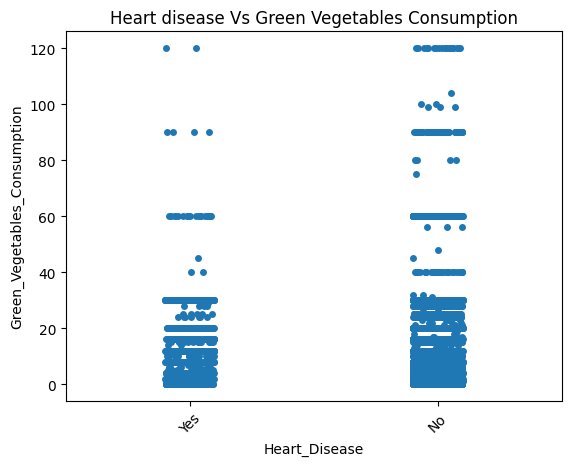

In [38]:
sns.stripplot(x='Heart_Disease', y='Green_Vegetables_Consumption', data=df, jitter=True)

plt.xticks(rotation=45)
plt.title('Heart disease Vs Green Vegetables Consumption')
plt.show()

#### The plot compares green vegetable consumption between people with and without heart disease. Both groups show a wide and overlapping range, indicating no strong visible difference in consumption patterns related to heart disease.

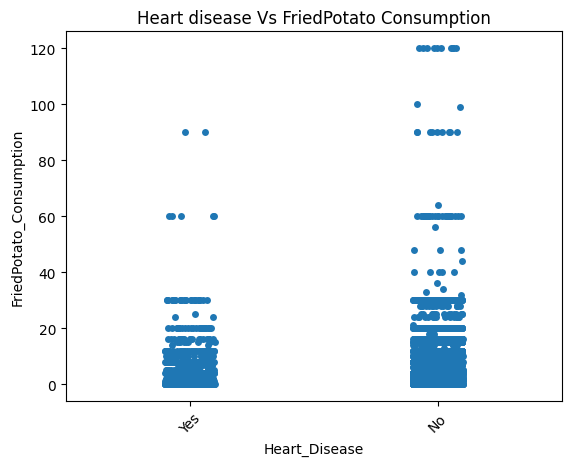

In [39]:
sns.stripplot(x='Heart_Disease', y='FriedPotato_Consumption', data=df, jitter=True)

plt.xticks(rotation=45)
plt.title('Heart disease Vs FriedPotato Consumption')
plt.show()

#### The plot shows fried potato consumption among individuals with and without heart disease. Both groups have similar spread and density, indicating no clear visual link between fried potato consumption and heart disease presence.

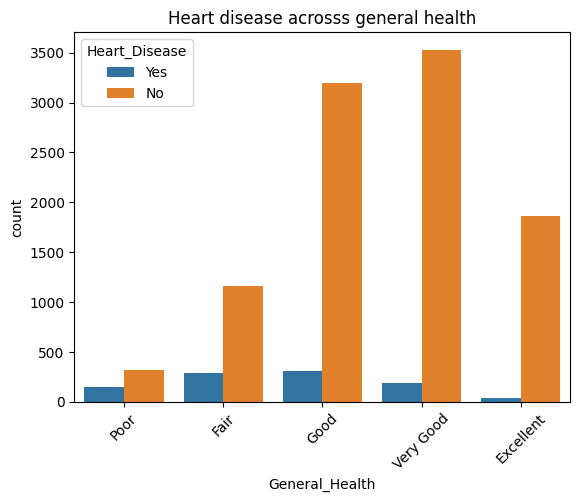

In [40]:
sns.countplot(x='General_Health', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss general health")
plt.show()

#### This plot shows the relationship between general health and heart disease. As general health improves from "Poor" to "Excellent," the number of people with heart disease (blue bars) decreases noticeably. This suggests that poorer self-rated health is associated with a higher likelihood of heart disease.

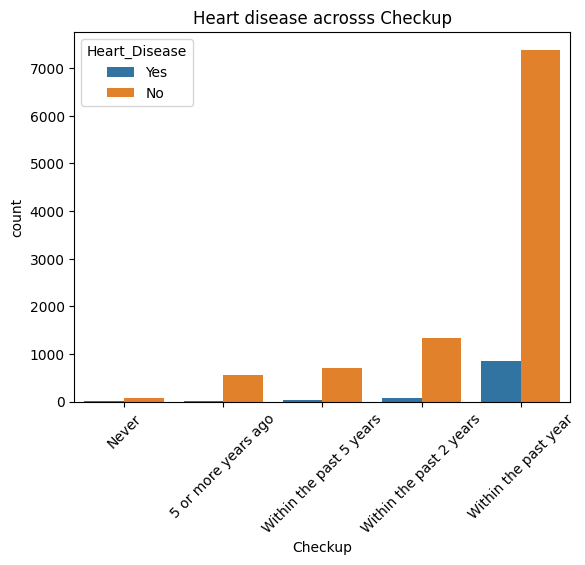

In [41]:
sns.countplot(x='Checkup', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss Checkup")
plt.show()

#### The plot suggests that people with heart disease tend to have more recent checkups, with the highest number of heart disease cases among those who visited a doctor in the past year. This may indicate that regular checkups help detect heart disease early.

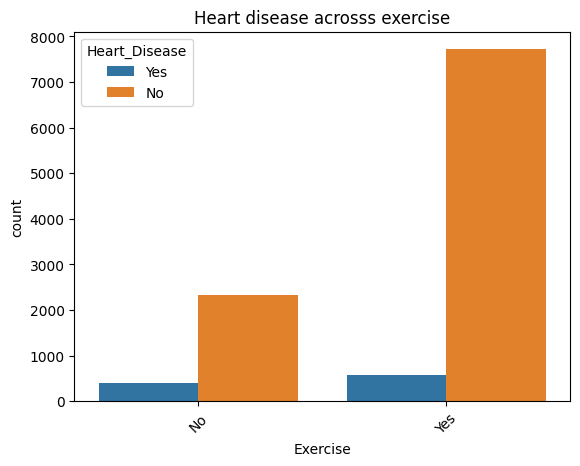

In [42]:
sns.countplot(x='Exercise', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss exercise")
plt.show()

#### People who exercise are significantly less likely to have heart disease compared to those who don’t. The chart shows a much higher count of heart disease among non-exercisers, suggesting a strong association between regular exercise and heart health.

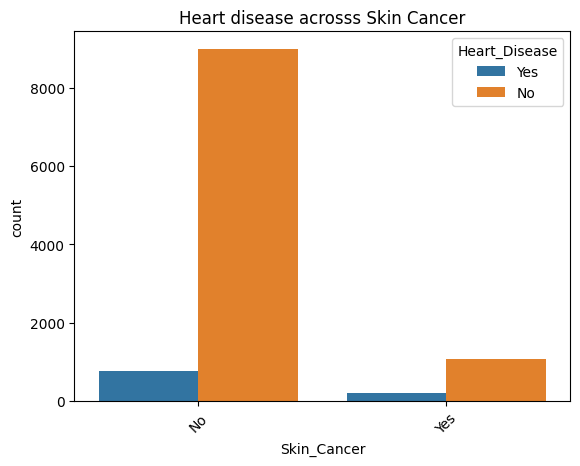

In [43]:
sns.countplot(x='Skin_Cancer', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss Skin Cancer")
plt.show()

#### People with skin cancer appear to have a slightly higher proportion of heart disease compared to those without skin cancer. However, the overall number of cases is much lower, so the association is weak based on this plot alone.

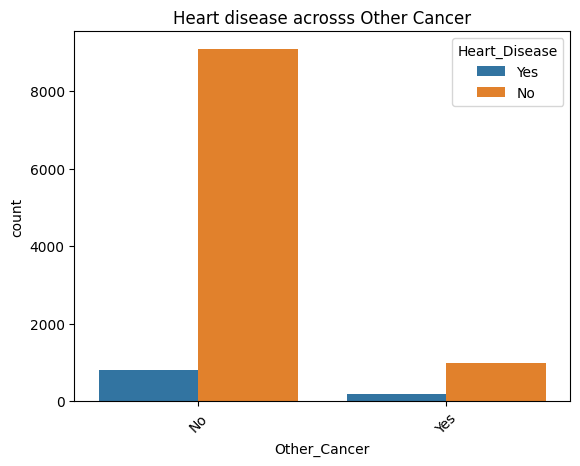

In [44]:
sns.countplot(x='Other_Cancer', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss Other Cancer")
plt.show()

#### People with other types of cancer have a slightly higher proportion of heart disease compared to those without. However, like with skin cancer, the overall number of individuals with both heart disease and other cancer is relatively low, suggesting only a weak association.

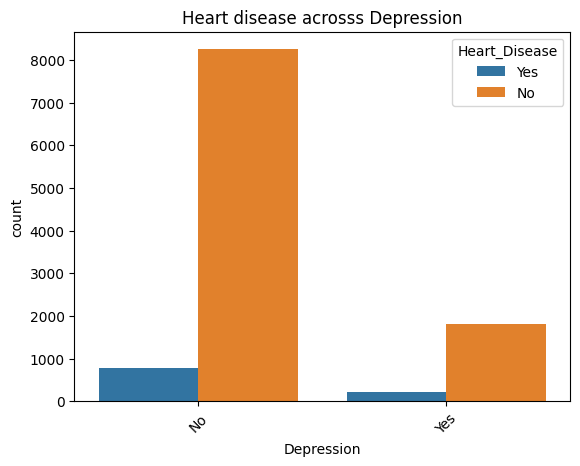

In [45]:
sns.countplot(x='Depression', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss Depression")
plt.show()

#### People with depression show a higher proportion of heart disease compared to those without depression. Although most individuals (depressed or not) do not have heart disease, the rate of heart disease is noticeably higher among those with depression, suggesting a stronger possible link between depression and heart disease than seen in previous plots.

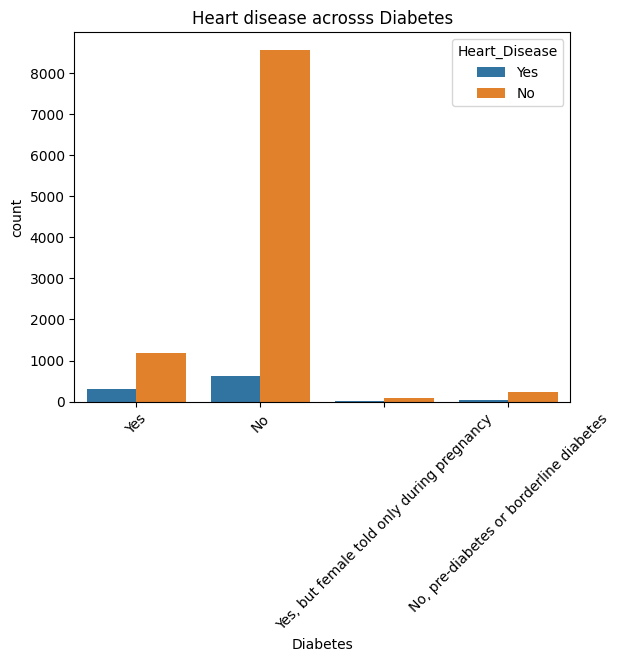

In [46]:
sns.countplot(x='Diabetes', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss Diabetes")
plt.show()

#### People with diabetes—especially those with a clear diagnosis (“Yes”)—have a higher proportion of heart disease compared to those without diabetes. The trend is evident across other diabetes-related categories too (like borderline diabetes), though to a lesser extent.There appears to be a strong association between diabetes and heart disease, making diabetes a significant risk factor.

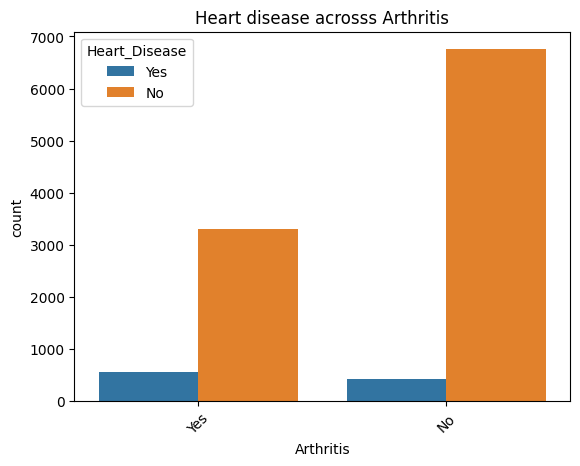

In [47]:
sns.countplot(x='Arthritis', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss Arthritis")
plt.show()

#### People with arthritis show a higher proportion of heart disease compared to those without it, suggesting a possible link between the two conditions.

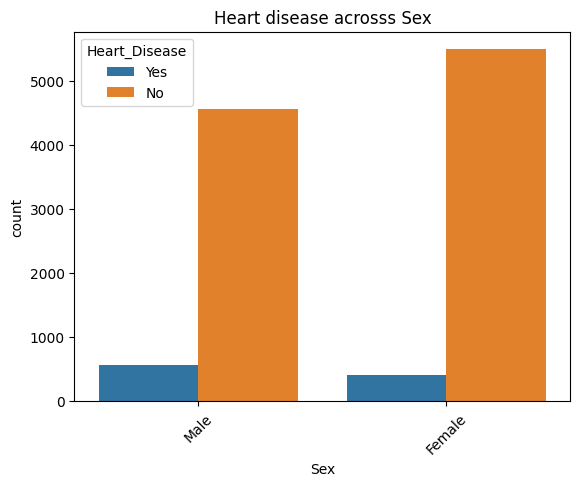

In [48]:
sns.countplot(x='Sex', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss Sex")
plt.show()

#### The chart shows that most people, both male and female, do not have heart disease. However, heart disease is slightly more common in males than in females.

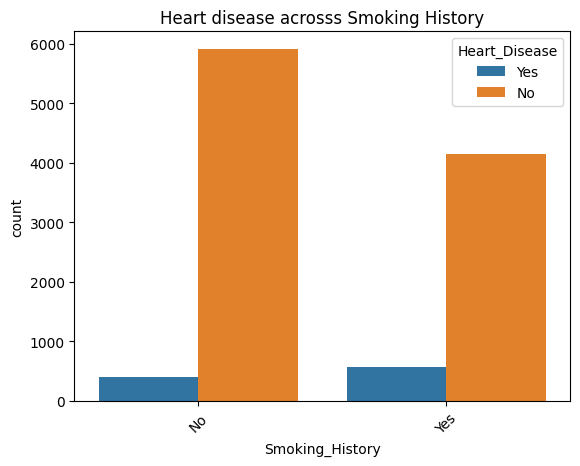

In [49]:
sns.countplot(x='Smoking_History', hue='Heart_Disease', data=df)
plt.xticks(rotation=45)
plt.title("Heart disease acrosss Smoking History")
plt.show()

#### People who have smoked are more likely to have heart disease compared to those who haven’t, even though there are more non-smokers overall.

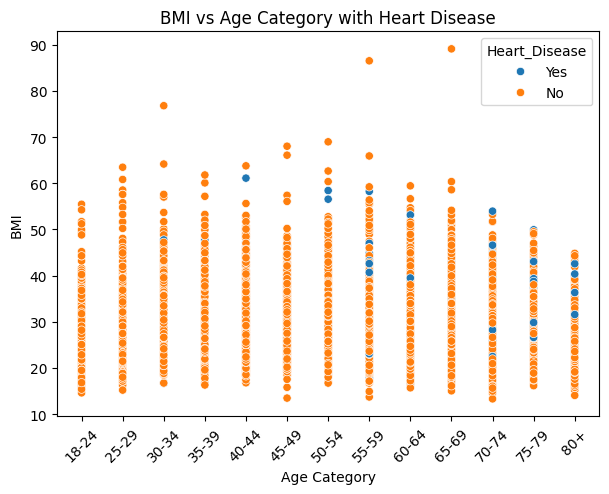

In [50]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Age_Category', y='BMI', hue='Heart_Disease')
plt.title('BMI vs Age Category with Heart Disease')
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

#### The scatter plot shows the relationship between BMI and age categories, highlighting heart disease presence. Blue dots (heart disease) appear more in middle-aged and older groups (45+), while BMI varies widely across all ages. Although higher BMI is common in both groups, there's a slight clustering of heart disease cases in the moderate to high BMI range. Overall, no strong direct correlation is evident.

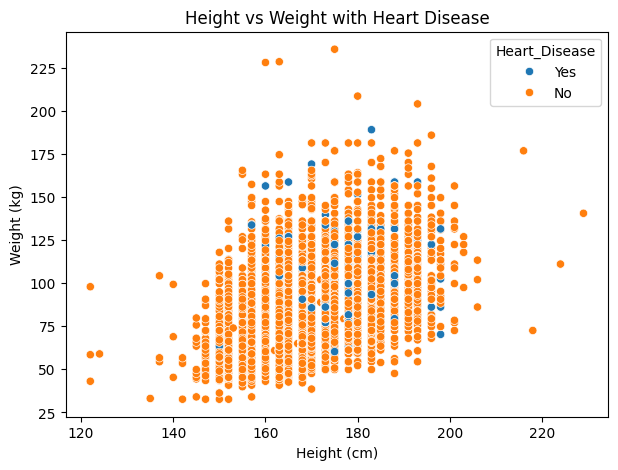

In [51]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Height_(cm)', y='Weight_(kg)', hue='Heart_Disease')
plt.title('Height vs Weight with Heart Disease')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### The scatter plot shows the relationship between height and weight, categorized by heart disease status. Most individuals fall within the mid-range of height (145–190 cm) and weight (50–150 kg). Orange dots (no heart disease) dominate, while blue dots (heart disease) are fewer. There is no clear separation between the two groups, suggesting height and weight alone may not strongly indicate heart disease.

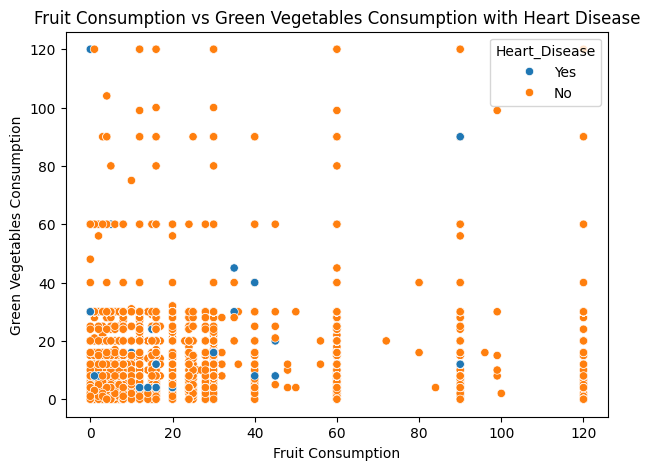

In [52]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Fruit_Consumption', y='Green_Vegetables_Consumption', hue='Heart_Disease')
plt.title('Fruit Consumption vs Green Vegetables Consumption with Heart Disease')
plt.xlabel('Fruit Consumption')
plt.ylabel('Green Vegetables Consumption')
plt.show()

#### The plot shows that most individuals without heart disease have low to moderate fruit and vegetable intake, while those with heart disease are fewer and scattered, suggesting weak correlation between diet and heart disease.

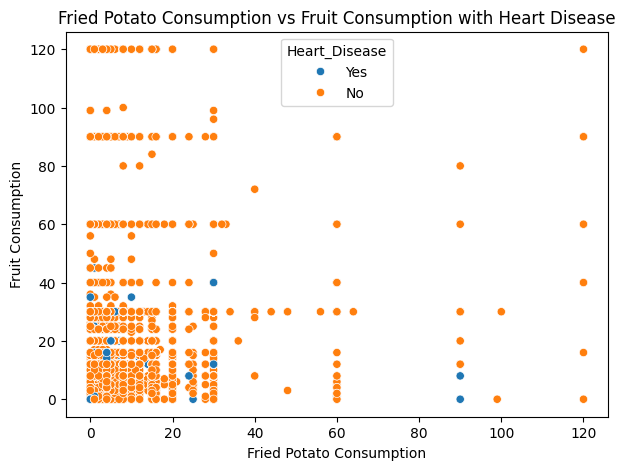

In [53]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='FriedPotato_Consumption', y='Fruit_Consumption', hue='Heart_Disease')
plt.title('Fried Potato Consumption vs Fruit Consumption with Heart Disease')
plt.xlabel('Fried Potato Consumption')
plt.ylabel('Fruit Consumption')
plt.show()

#### Most people consume low to moderate fried potatoes and fruits, with few heart disease cases scattered, showing little correlation with these foods.

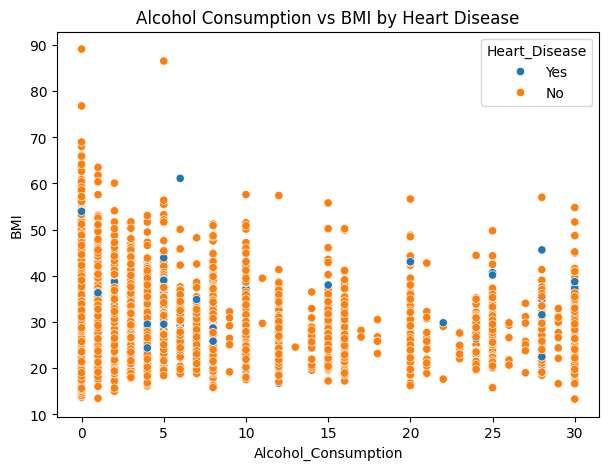

In [54]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Alcohol_Consumption', y='BMI', hue='Heart_Disease')
plt.title('Alcohol Consumption vs BMI by Heart Disease')
plt.show()

#### The plot shows that people with heart disease often have a higher BMI, but there's no clear link between alcohol consumption and heart disease.

## Multivariate Analysis
* Examination of more than two variables simultaneously to understand relationships and patterns among them.

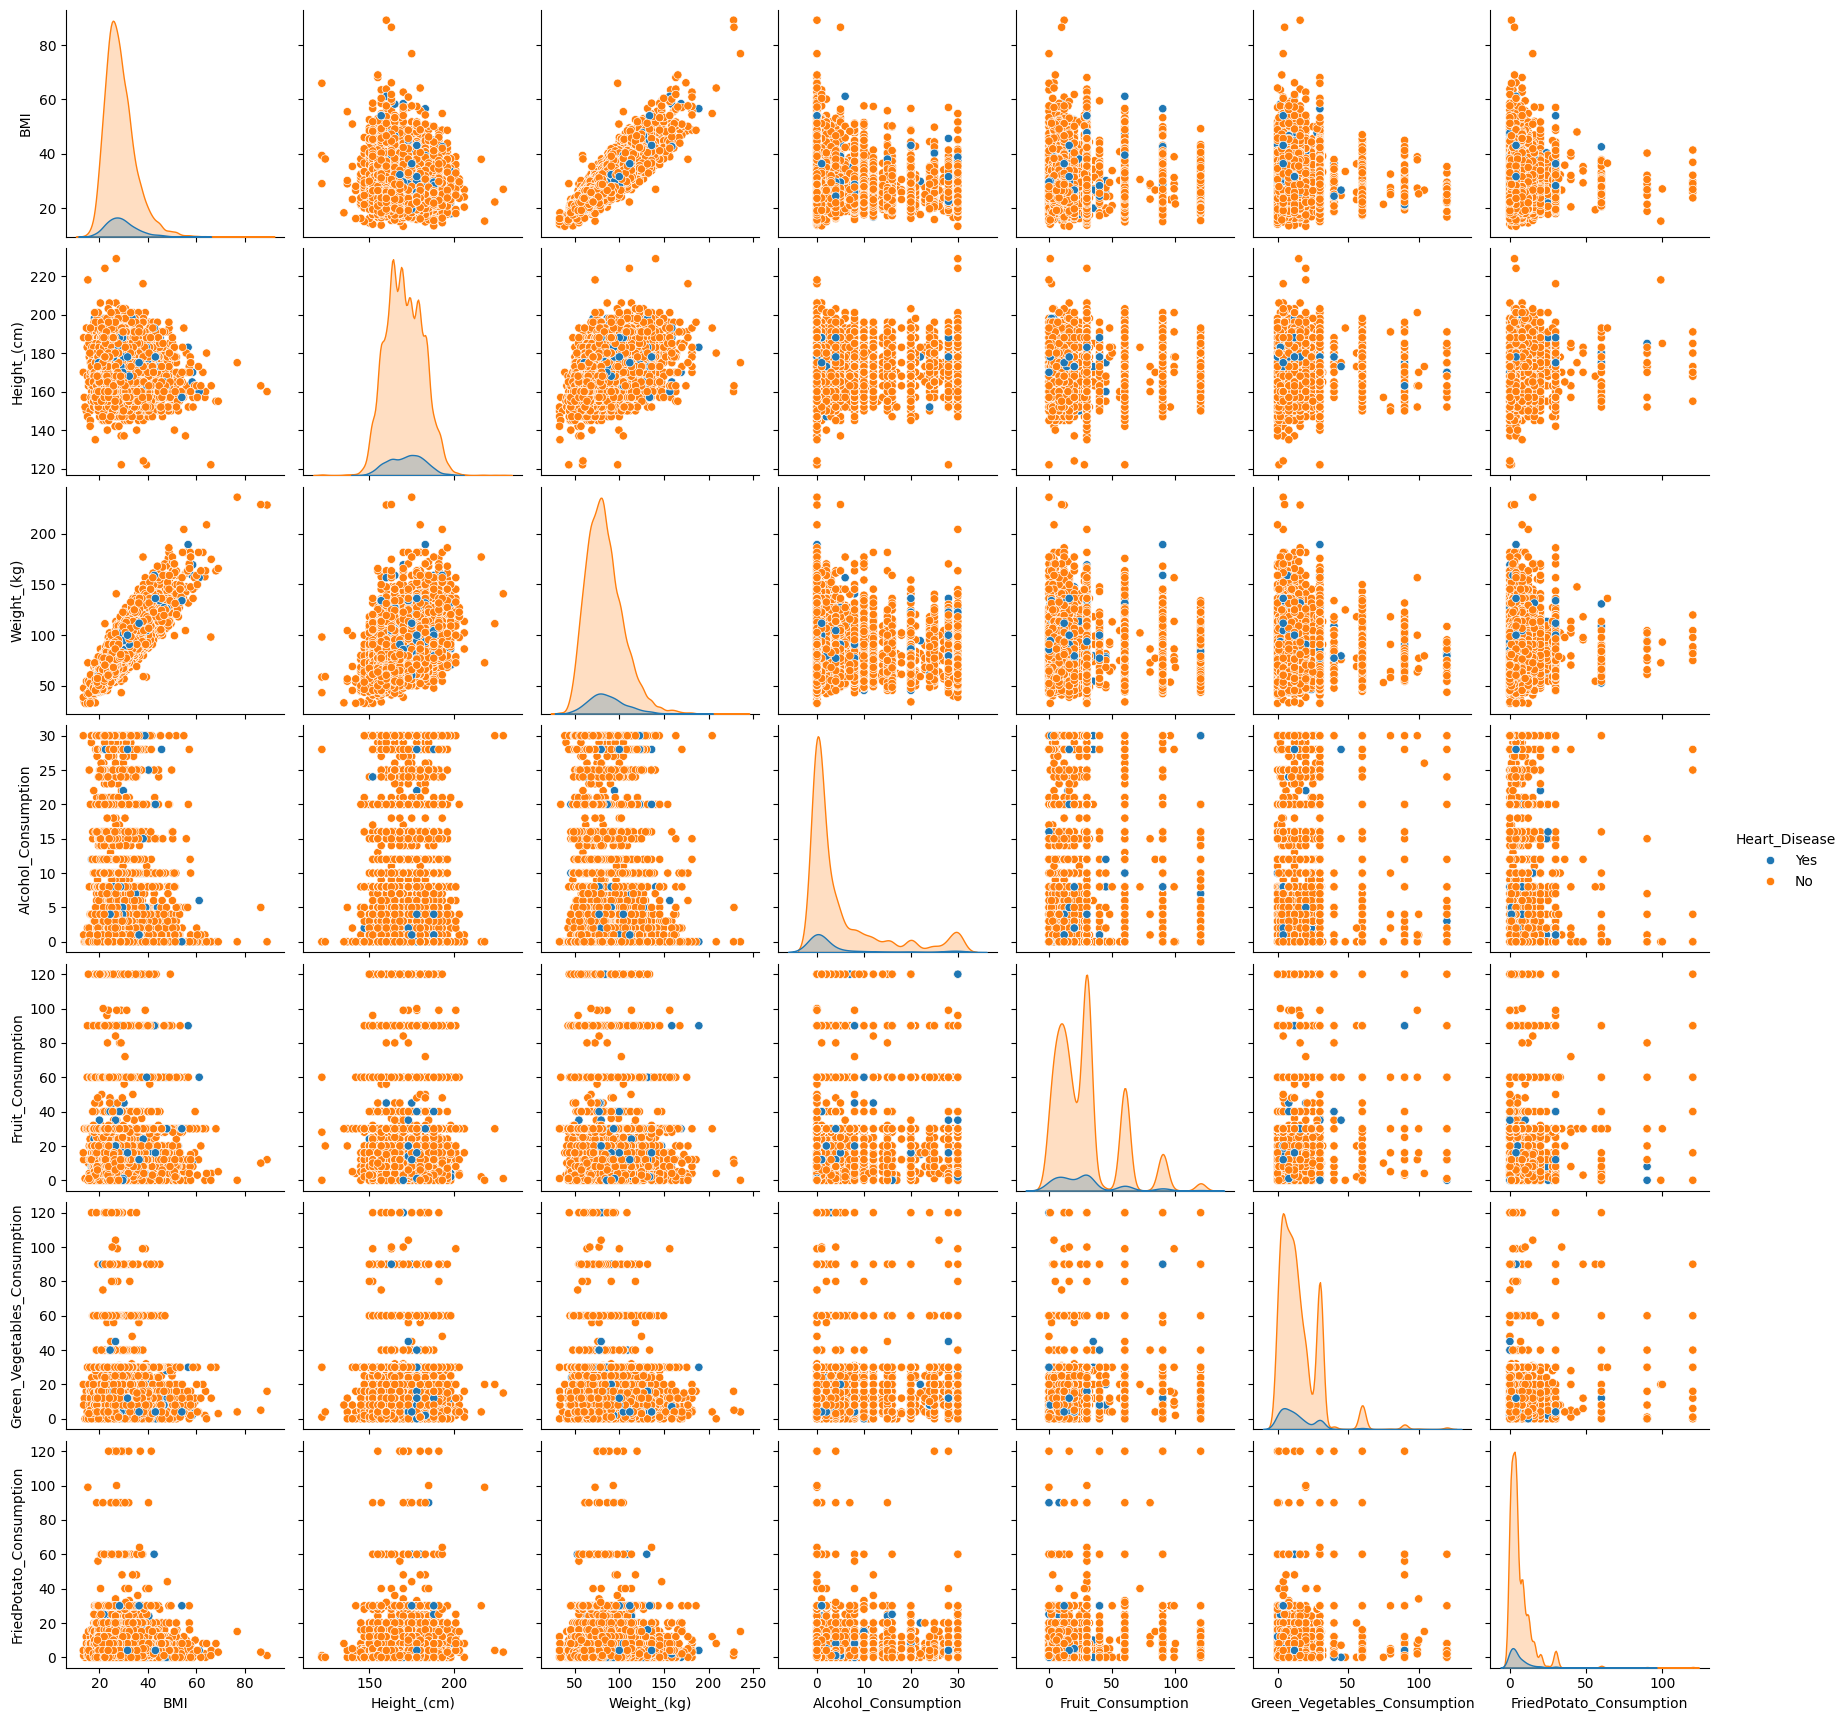

In [55]:
# Select numerical columns for pairplot
numerical_columns = ['BMI', 'Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
sns.pairplot(df[numerical_columns + ['Heart_Disease']], hue='Heart_Disease')
plt.show()


#### The pair plot shows that people with heart disease often have higher BMI and weight. Lower fruit/vegetable intake and higher fried food consumption also appear more common among them, suggesting potential risk factors.

### Visualizing Feature Correlation with Heatmap

#### **Purpose**
A correlation heatmap helps to analyze the relationships between numerical features in a dataset. It provides a clear visual representation of how strongly features are associated with one another.

- Identify highly correlated features to reduce redundancy (feature selection).
- Detect weak correlations for exploring new interactions.
- Gain insights to optimize feature engineering.

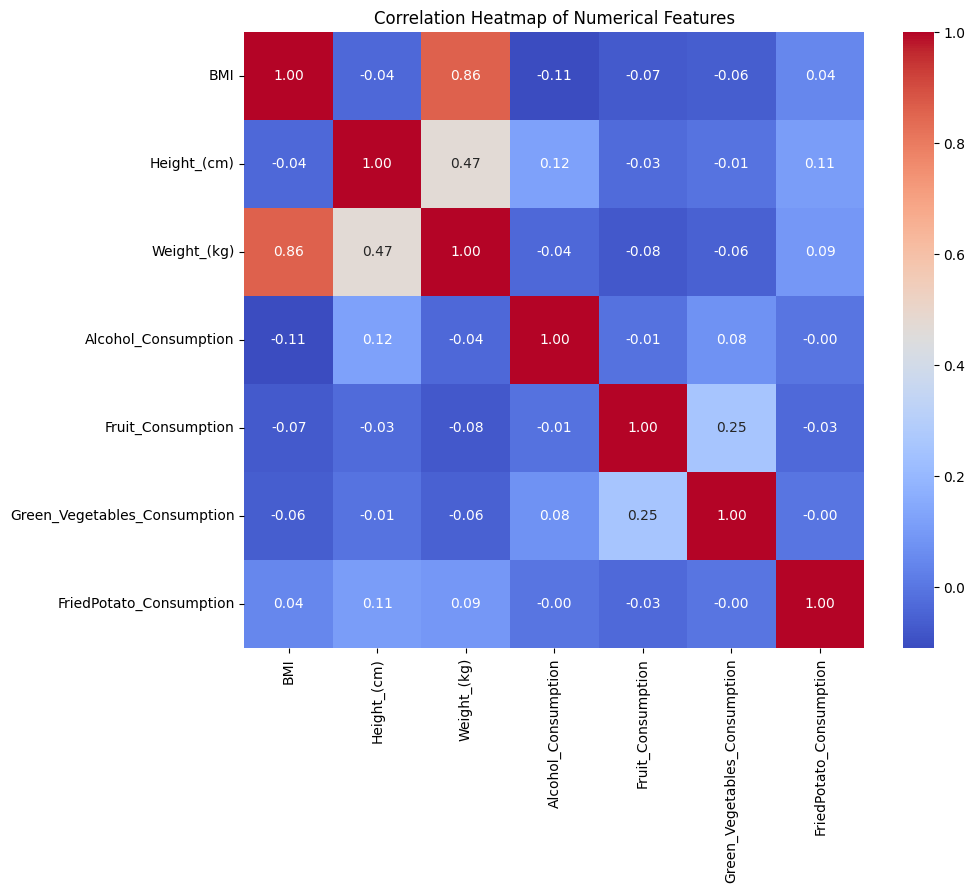

In [56]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Shows a strong positive correlation between BMI and Weight (0.86), and a moderate one between Height and Weight (0.47). BMI has almost no correlation with Height (-0.04). A weak positive link exists between Fruit and Green Vegetables Consumption (0.25). Most other features show negligible correlations, indicating low multicollinearity except between BMI and Weight.

## Visualisation before treating Outlires
* Visualizing Numerical Columns with Boxplots

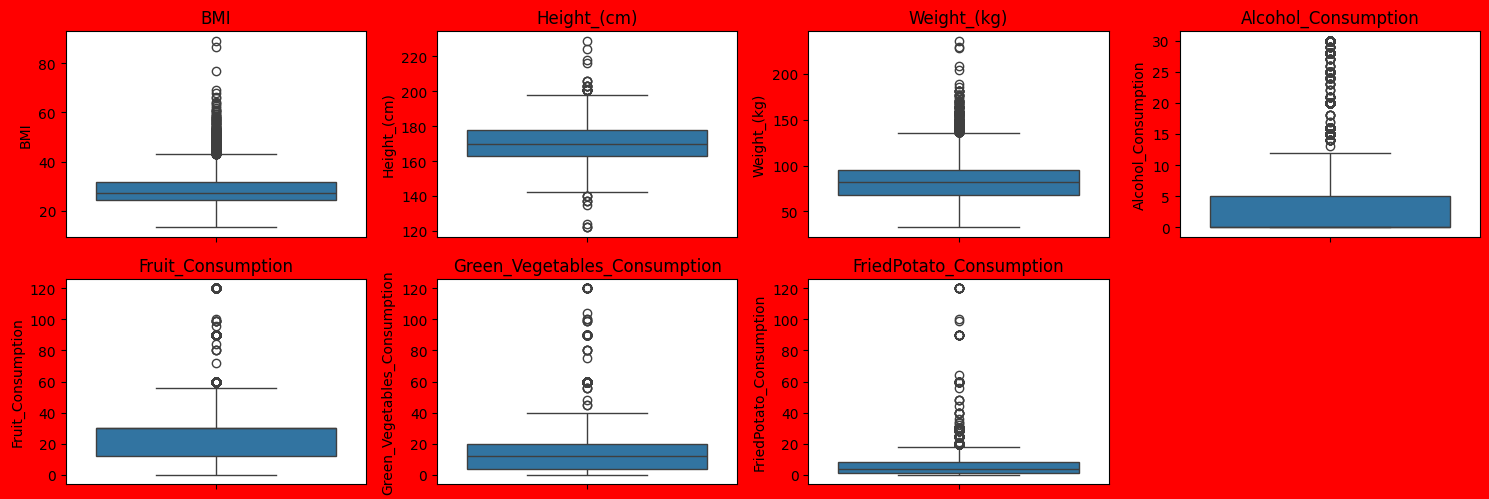

In [57]:
plt.figure(figsize=(15, 10),facecolor='red')

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i) 
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Handling Outliers with IQR Method

1. **Calculate Quartiles**:
   - `Q1 = data[col].quantile(0.25)`:
     - Computes the first quartile (25th percentile) of the column.
   - `Q3 = data[col].quantile(0.75)`:
     - Computes the third quartile (75th percentile) of the column.

2. **Interquartile Range (IQR)**:
   - `IQR = Q3 - Q1`:
     - Measures the spread of the middle 50% of the data.

3. **Determine Outlier Bounds**:
   - `lower_bound = Q1 - 1.5 * IQR`:
     - Calculates the lower threshold for outliers.
   - `upper_bound = Q3 + 1.5 * IQR`:
     - Calculates the upper threshold for outliers.

4. **Cap or Floor Outliers**:
   - `data[col] = np.where(data[col] < lower_bound, lower_bound, np.where(data[col] > upper_bound, upper_bound, data[col]))`:
     - Applies conditional logic:
       - If the value is below the lower bound, it is replaced with `lower_bound`.
       - If the value is above the upper bound, it is replaced with `upper_bound`.
       - Otherwise, the value remains unchanged.

5. **Iterate Through Numerical Columns**:
   - `for col in num_col:`:
     - Loops through all numerical columns to apply the outlier treatment.

#### **Advantages**
- Effectively handles outliers without removing data, preserving dataset size.
- Ensures the numerical values remain within reasonable bounds for improved model performance.

In [58]:
for col in numerical_columns:
    if df[col].dtype in [np.float64, np.int64]: 
        Q1=df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))

## Visualisation after treating Outlires

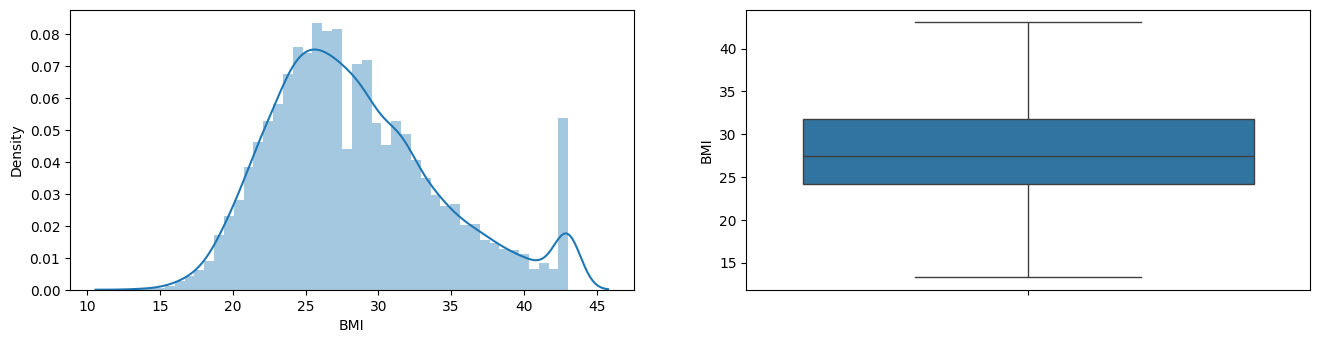

In [59]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['BMI'])

plt.subplot(2,2,2)
sns.boxplot(df['BMI'])
plt.show()

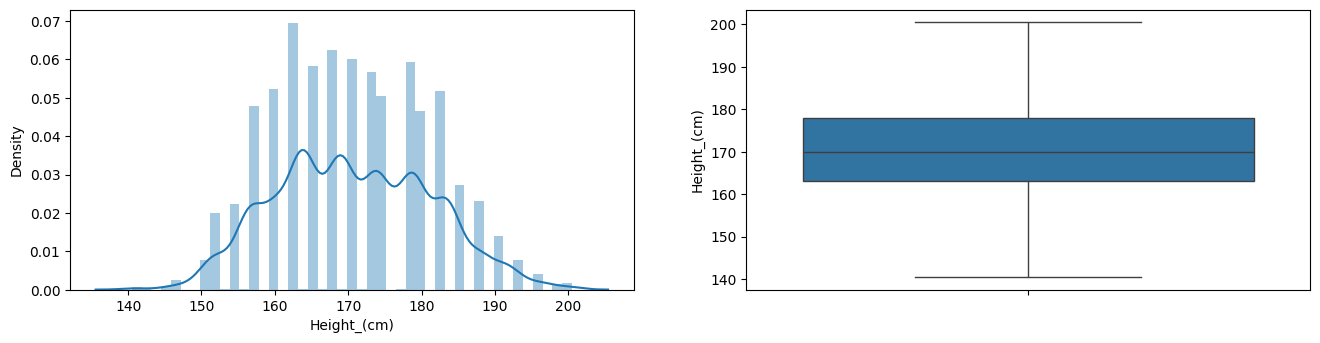

In [60]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Height_(cm)'])

plt.subplot(2,2,2)
sns.boxplot(df['Height_(cm)'])
plt.show()

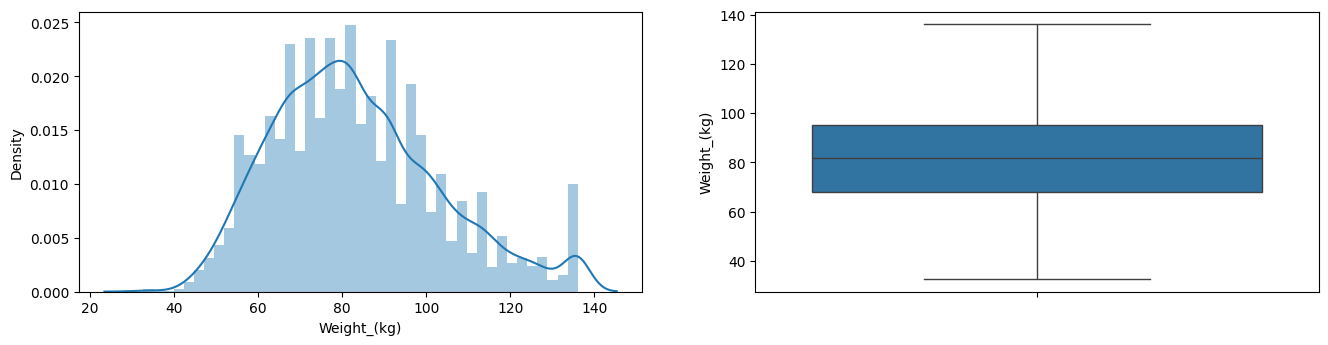

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Weight_(kg)'])

plt.subplot(2,2,2)
sns.boxplot(df['Weight_(kg)'])
plt.show()

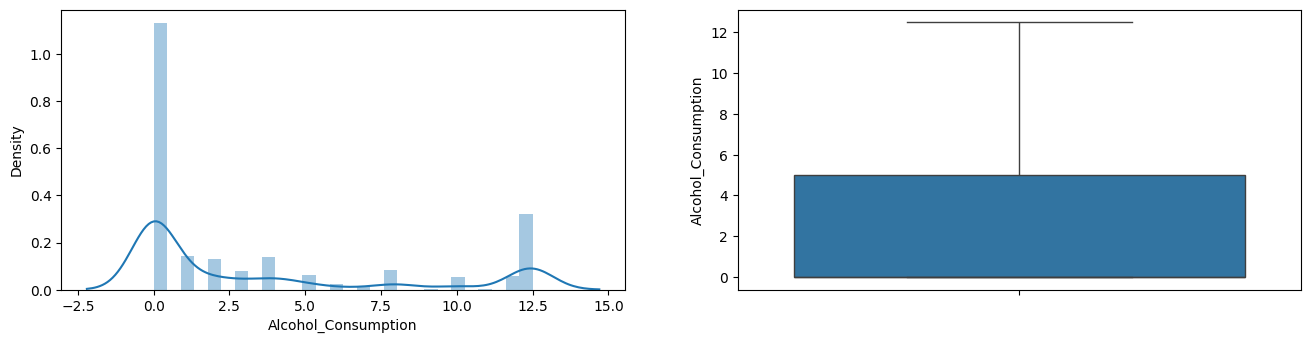

In [62]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Alcohol_Consumption'])

plt.subplot(2,2,2)
sns.boxplot(df['Alcohol_Consumption'])
plt.show()

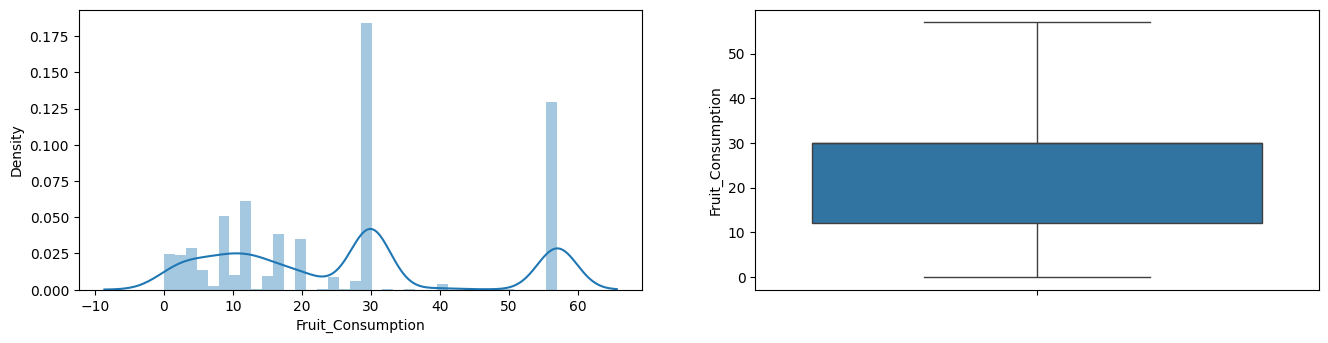

In [63]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Fruit_Consumption'])

plt.subplot(2,2,2)
sns.boxplot(df['Fruit_Consumption'])
plt.show()

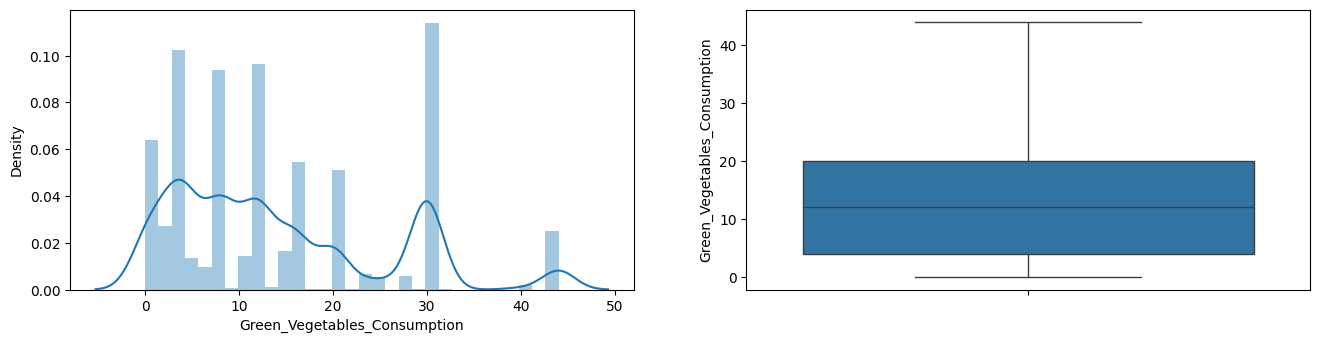

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Green_Vegetables_Consumption'])

plt.subplot(2,2,2)
sns.boxplot(df['Green_Vegetables_Consumption'])
plt.show()

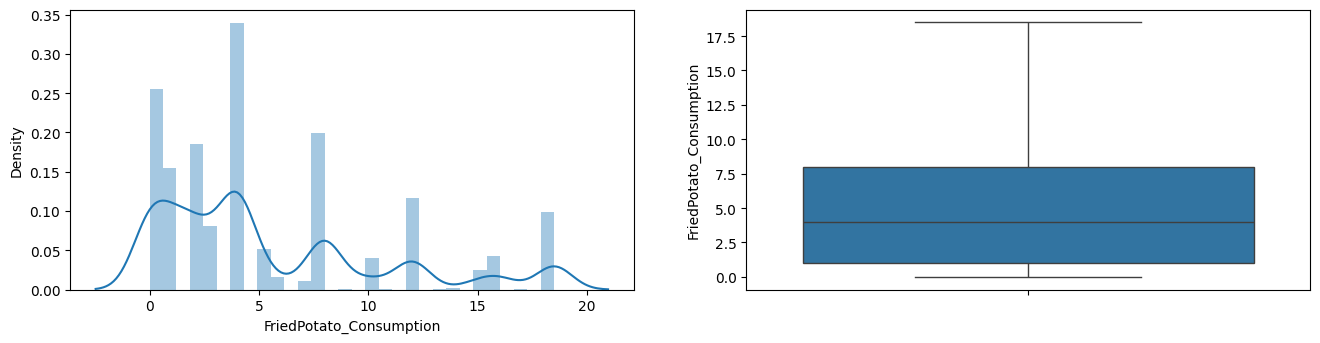

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['FriedPotato_Consumption'])

plt.subplot(2,2,2)
sns.boxplot(df['FriedPotato_Consumption'])
plt.show()

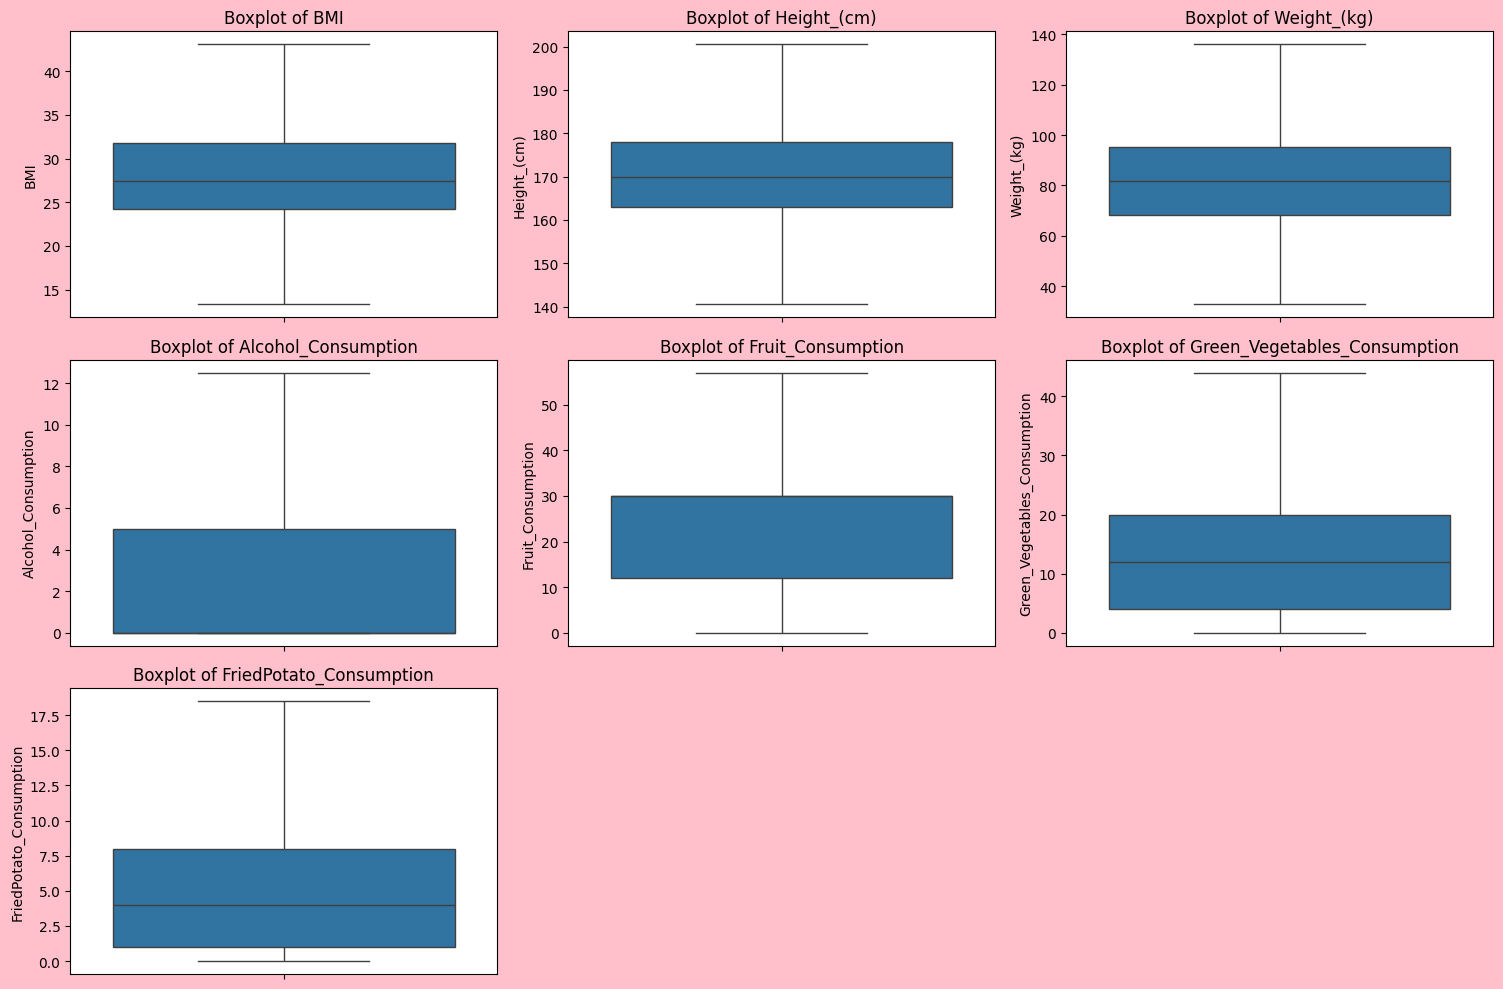

In [66]:
counter = 1
plt.figure(figsize=(15, 10),facecolor='pink')

for col in numerical_columns:
    plt.subplot(3, 3, counter)  
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    counter += 1  

plt.tight_layout()
plt.show()

## Calculating Skewness of Numerical Columns
* Skewness indicates the asymmetry of the distribution:
* Positive Skew: Tail is longer on the right side.
* Negative Skew: Tail is longer on the left side.
* Zero Skew: Symmetrical distribution.

In [67]:
for col in numerical_columns:
    if df[col].dtype in [np.float64, np.int64]: 
     skew_value = df[col].skew()
     print (col,":",skew_value)

BMI : 0.6416861420917882
Height_(cm) : 0.1285812844113772
Weight_(kg) : 0.5740526584690134
Alcohol_Consumption : 1.0783688841764931
Fruit_Consumption : 0.5295889254884586
Green_Vegetables_Consumption : 0.8440929455033354
FriedPotato_Consumption : 1.102591783709343


## Encoding

### Ordinal Encoder
Ordinal Encoder converts ordered categorical values into integer labels (e.g., "Low", "Medium", "High" → 0, 1, 2) so they can be used in machine learning models.
 * Creates an OrdinalEncoder instance.

 * Selects the columns with ordered categories (General_Health, Checkup, Age_Category).

 * Encodes them into numeric values using fit_transform().

 * Replaces the original columns in the DataFrame with the encoded numeric versions.

In [68]:
from sklearn.preprocessing import OrdinalEncoder
Ord_enc = OrdinalEncoder()
Order_categories_cols = df[['General_Health','Checkup','Age_Category']]
Order_categories_cols = Ord_enc.fit_transform(Order_categories_cols)
df[['General_Health','Checkup','Age_Category']] = Order_categories_cols

### Label Encoder
LabelEncoder converts categorical labels into numeric values (e.g., "Yes", "No" → 1, 0). Best for encoding the target variable or binary features.
 * Creates a LabelEncoder instance.

 * Selects binary categorical columns (with 2 values like "Yes"/"No" or "Male"/"Female").

 * Loops through each column in the list.

 * Applies LabelEncoder to convert each column’s values into 0 and 1.

 * Updates the DataFrame with the encoded values.

In [69]:
from sklearn.preprocessing import LabelEncoder
Lab_enc = LabelEncoder()
Binary_categories_cols = df[['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Smoking_History']]
for cols in Binary_categories_cols:
    df[cols] = Lab_enc.fit_transform(df[cols])

In [70]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3.0,1.0,0,1,0,0,0,2,1,1,10.0,175.0,95.25,31.01,0,0.0,30.0,4.0,0.0
1,3.0,1.0,1,0,0,1,0,0,1,1,10.0,175.0,72.57,23.63,1,0.0,30.0,4.0,0.0
2,3.0,1.0,0,0,0,0,1,0,0,1,10.0,183.0,77.11,23.06,1,0.0,3.0,1.0,4.0
3,3.0,0.0,1,0,0,0,0,0,0,1,0.0,180.0,72.57,22.32,0,0.0,12.0,4.0,12.0
4,3.0,0.0,1,0,0,0,0,0,0,1,3.0,178.0,102.06,32.28,0,0.0,30.0,8.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11029,0.0,4.0,1,0,0,0,0,0,1,1,12.0,178.0,70.31,22.24,0,12.5,30.0,24.0,0.0
11030,0.0,4.0,0,1,0,0,0,0,1,1,12.0,178.0,99.79,31.57,1,12.5,16.0,12.0,4.0
11031,0.0,4.0,1,0,0,0,0,2,1,1,12.0,168.0,80.74,28.73,0,0.0,12.0,16.0,1.0
11032,0.0,4.0,1,0,0,0,0,0,0,1,12.0,178.0,70.31,22.24,0,12.5,57.0,44.0,0.0


In [97]:
X=df.drop('Heart_Disease',axis=1)
X=X.drop('Weight_(kg)',axis=1)

In [98]:
y = df['Heart_Disease']

## Standard Scaler
StandardScaler transforms features by removing the mean and scaling to unit variance — so each column has a mean of 0 and standard deviation of 1.
 * Imports StandardScaler from scikit-learn.

 * Selects numerical (or encoded) columns to be scaled.

 * Creates a scaler instance.

 * Standardizes the selected columns by transforming their values to have:
    * Mean = 0
    * Standard deviation = 1

 * Updates the DataFrame with the scaled values.

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Variance Inflation Factor
VIF (Variance Inflation Factor) measures how much a feature is correlated with other features (multicollinearity).
   * VIF = 1 → no multicollinearity
   * VIF > 5 or 10 → high multicollinearity (feature may be redundant)

Used to identify and remove highly correlated features in regression models.

 * Imports variance_inflation_factor from statsmodels.

 * Creates a DataFrame vif_data to store results.

 * For each feature (column) in df, it:

 * Calculates VIF (Variance Inflation Factor).

 * VIF shows how much a feature is correlated with other features.

 * Prints the VIF values for all features.

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print("\n📊 VIF Scores:")
print(vif_data)


📊 VIF Scores:
                         Feature       VIF
0                 General_Health  1.009838
1                        Checkup  1.080094
2                       Exercise  1.115174
3                    Skin_Cancer  1.108850
4                   Other_Cancer  1.076923
5                     Depression  1.093241
6                       Diabetes  1.110050
7                      Arthritis  1.245233
8                            Sex  2.149735
9                   Age_Category  1.461764
10                   Height_(cm)  2.098050
11                           BMI  1.100303
12               Smoking_History  1.074168
13           Alcohol_Consumption  1.073481
14             Fruit_Consumption  1.124227
15  Green_Vegetables_Consumption  1.121173
16       FriedPotato_Consumption  1.099808


In [101]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

#### The code uses RandomOverSampler to balance the dataset by duplicating samples from the minority class, ensuring equal representation of both classes. This helps prevent model bias and improves predictions for the minority class.

## Train-Test-Split
 * Splits your data (x = features, y = target) into training and testing sets.

 * test_size=0.30 means 30% of the data goes to testing, 70% to training.

 * random_state=42 ensures reproducibility (you get the same split every time).

 * You have 216,141 training samples and 92,633 test samples, each with 16 features.

 * The label sets Y_train and Y_test match the number of samples.

 * The data is properly split for a supervised learning task.

 * Prints the shapes of the resulting datasets (rows, columns).

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

## PERFORMING MACHINE LEARNING 

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [123]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

#### The code defines four machine learning models (Logistic Regression, KNN, Decision Tree, and Random Forest) in a dictionary, with configurations to handle class imbalance 

In [124]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n--- {name} (Tuned) ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression (Tuned) ---
Accuracy: 0.7196819085487077
Confusion Matrix:
 [[1380  632]
 [ 496 1516]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      2012
           1       0.71      0.75      0.73      2012

    accuracy                           0.72      4024
   macro avg       0.72      0.72      0.72      4024
weighted avg       0.72      0.72      0.72      4024


--- KNN (Tuned) ---
Accuracy: 0.9162524850894632
Confusion Matrix:
 [[1681  331]
 [   6 2006]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      2012
           1       0.86      1.00      0.92      2012

    accuracy                           0.92      4024
   macro avg       0.93      0.92      0.92      4024
weighted avg       0.93      0.92      0.92      4024


--- Decision Tree (Tuned) ---
Accuracy: 0.9532803180914513
Confusion Matrix:
 [[1826  186

## Summary and Observations:
 * Overall accuracy is 72%. The logistic regression model has balanced precision and recall for both classes, but the model performs moderately well in distinguishing between the two classes.
 * The KNN model performs excellently, with high precision and recall, especially for the positive class (class 1). However, the recall for class 0 (negative class) is lower compared to class 1. It still provides a very high overall accuracy of 91.6%.
 * The Decision Tree model achieves impressive performance, particularly excelling at classifying the positive class (class 1) with perfect recall. The negative class is correctly identified with high precision, although the recall for class 0 is slightly lower.
 * Random Forest performs extremely well with 99% accuracy. It achieves near-perfect precision and recall for both classes. The model handles both classes very well with almost no false negatives for class 1 and a very low number of false positives for class 0.

## The End